In [1]:
import sqlite3
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

def get_accuracy(cm):
    my_cm = np.array(cm)
    return np.sum(np.diagonal(my_cm))/(np.sum(my_cm[:]))

def get_accuracies(*cm):
    my_res = []
    for mycm in cm:
        my_res.append(get_accuracy(mycm))
    return my_res

def preprocess_hyp(hyp):
    if 'coef0' not in hyp.keys():
        hyp['coef0'] = np.NAN
    if 'gamma' not in hyp.keys():
        hyp['gamma'] = np.NAN
    if 'degree' not in hyp.keys():
        hyp['degree'] = np.NAN
    return hyp

def process_row(row, data=[]):

    train_sizes = json.loads(row.train_sizes)
    result_dict = eval(row.result)
    hyp = json.loads(row.hyperparameters)
    hyp = preprocess_hyp(hyp)

    for trn in train_sizes:
        [labels, cm_train, cm_valid, cm_test, cm_valid_sub, cm_test_sub, fit_time, predict_time_train, predict_time_valid, predict_time_test, additional_log_data] = json.loads(result_dict[trn].replace('""', '"'))

        [acc_train, acc_valid, acc_test, acc_valid_sub, acc_test_sub] = get_accuracies(cm_train, cm_valid, cm_test, cm_valid_sub, cm_test_sub)

        data.append([row.ID, row.openmlid, row.seed_outer, row.seed_inner, row.monotonic, row.hyperparameters, hyp['C'], hyp['break_ties'], hyp['kernel'], hyp['tol'], hyp['gamma'], trn, acc_train, acc_valid, acc_test, acc_valid_sub, acc_test_sub, fit_time, predict_time_train, predict_time_valid, predict_time_test])

    return data

def process_rows(df):

    data = []
    for i in range(0,len(df)):
        row = df.iloc[i]
        data = process_row(row,data)
    curves = pd.DataFrame(data, columns=['ID', 'openmlid', 'seed_outer', 'seed_inner', 'monotonic', 'hyperparameters', 'C', 'break_ties', 'kernel', 'tol', 'gamma', 'trainsize', 'acc_train', 'acc_valid', 'acc_test', 'acc_valid_sub', 'acc_test_sub', 'fit_time', 'predict_time_train', 'predict_time_valid', 'predict_time_test'])
    return curves

def get_dataset_name(dataset):
    if dataset == 3:
        return 'kr-vs-kp'
    if dataset == 6:
        return 'letter'
    if dataset == 11:
        return 'balance-scale'
    if dataset == 12:
        return 'mfeat-factors'
    if dataset == 14:
        return 'mfeat-fourier'
    if dataset == 15:
        return 'breast-w'
    if dataset == 16:
        return 'mfeat-karhunen'
    if dataset == 18:
        return 'mfeat-morphological'


In [2]:
cnx = sqlite3.connect('C:\\Users\\tjviering\\Desktop\\lcdb.db')

df = pd.read_sql_query("SELECT * FROM svm", cnx)

In [3]:
df[df["status"] == "done"]["openmlid"].unique()

array([ 3,  6, 11, 12, 14, 15, 16, 18], dtype=int64)

In [4]:
def plot_lc(dataset):

    df_done = df[(df["status"]=="done") & (df["openmlid"]==dataset)]
    curves = process_rows(df_done)

    grouped = curves.groupby('hyperparameters')

    ind = 1
    for name, group in grouped:
        plt.plot(group["trainsize"], group["acc_test"], label=ind.__str__())
        ind+=1
    plt.legend(loc='right')

    ind = 1
    for name, group in grouped:
        print('%d - %s' % (ind, name))
        ind += 1

    plt.xscale('log')

    plt.title('lc dataset %d - %s' % (dataset, get_dataset_name(dataset)))
    plt.ylabel('test accuracy')
    plt.xlabel('trainsize')

In [5]:
def plot_fit_curve(dataset):

    df_done = df[(df["status"]=="done") & (df["openmlid"]==dataset)]
    curves = process_rows(df_done)

    grouped = curves.groupby('hyperparameters')

    ind = 1
    for name, group in grouped:
        plt.plot(group["trainsize"], group["fit_time"], label=ind.__str__())
        ind+=1
    plt.legend(loc='right')

    ind = 1
    for name, group in grouped:
        print('%d - %s' % (ind, name))
        ind += 1

    plt.title('lc dataset %d - %s' % (dataset, get_dataset_name(dataset)))

    plt.yscale('log')

    plt.ylabel('fit time')
    plt.xlabel('trainsize')

1 - {"C": 0.0011973686775627167, "break_ties": true, "kernel": "sigmoid", "tol": 0.001, "coef0": 3.429402546113748e-05, "gamma": 125.11828955088302}
2 - {"C": 0.0015565580572890335, "break_ties": false, "kernel": "poly", "tol": 0.001, "coef0": 0.010141812764347587, "degree": 5, "gamma": 6.144420182700425e-08}
3 - {"C": 10599069.547276195, "break_ties": true, "kernel": "rbf", "tol": 0.001, "gamma": 3101.630241558003}
4 - {"C": 176486.70746326947, "break_ties": true, "kernel": "sigmoid", "tol": 0.001, "coef0": 0.0020581464583522544, "gamma": 2.987402060797008e-09}
5 - {"C": 283491770.5937483, "break_ties": true, "kernel": "poly", "tol": 0.001, "coef0": 0.005443166683794488, "degree": 2, "gamma": 95286243716.9023}
6 - {"C": 5465.2075550902, "break_ties": true, "kernel": "linear", "tol": 0.001}
7 - {"C": 619041.4305079113, "break_ties": false, "kernel": "linear", "tol": 0.001}
8 - {"C": 77847.45842463325, "break_ties": true, "kernel": "sigmoid", "tol": 0.001, "coef0": 1.253279198776803e-09

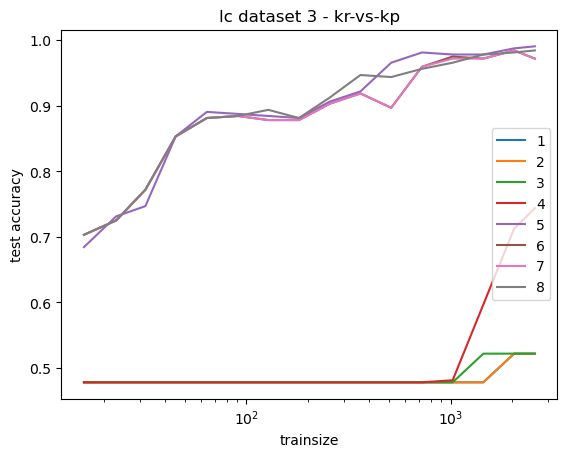

In [6]:
plot_lc(3)

1 - {"C": 0.0011973686775627167, "break_ties": true, "kernel": "sigmoid", "tol": 0.001, "coef0": 3.429402546113748e-05, "gamma": 125.11828955088302}
2 - {"C": 0.0015565580572890335, "break_ties": false, "kernel": "poly", "tol": 0.001, "coef0": 0.010141812764347587, "degree": 5, "gamma": 6.144420182700425e-08}
3 - {"C": 10599069.547276195, "break_ties": true, "kernel": "rbf", "tol": 0.001, "gamma": 3101.630241558003}
4 - {"C": 176486.70746326947, "break_ties": true, "kernel": "sigmoid", "tol": 0.001, "coef0": 0.0020581464583522544, "gamma": 2.987402060797008e-09}
5 - {"C": 283491770.5937483, "break_ties": true, "kernel": "poly", "tol": 0.001, "coef0": 0.005443166683794488, "degree": 2, "gamma": 95286243716.9023}
6 - {"C": 5465.2075550902, "break_ties": true, "kernel": "linear", "tol": 0.001}
7 - {"C": 619041.4305079113, "break_ties": false, "kernel": "linear", "tol": 0.001}
8 - {"C": 77847.45842463325, "break_ties": true, "kernel": "sigmoid", "tol": 0.001, "coef0": 1.253279198776803e-09

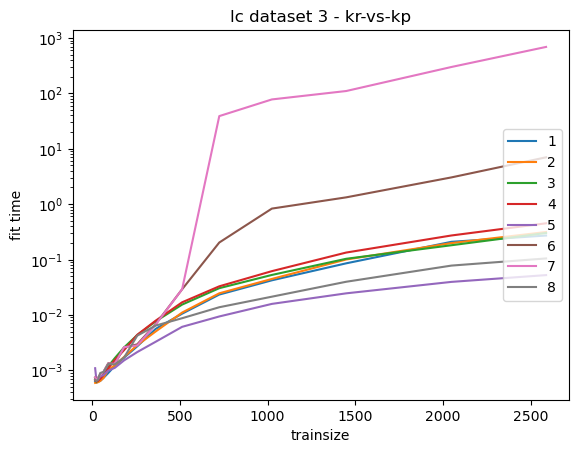

In [7]:
plot_fit_curve(3)

1 - {"C": 0.0011973686775627167, "break_ties": true, "kernel": "sigmoid", "tol": 0.001, "coef0": 3.429402546113748e-05, "gamma": 125.11828955088302}
2 - {"C": 0.0015565580572890335, "break_ties": false, "kernel": "poly", "tol": 0.001, "coef0": 0.010141812764347587, "degree": 5, "gamma": 6.144420182700425e-08}
3 - {"C": 10599069.547276195, "break_ties": true, "kernel": "rbf", "tol": 0.001, "gamma": 3101.630241558003}
4 - {"C": 133007389881.91135, "break_ties": false, "kernel": "linear", "tol": 0.001}
5 - {"C": 176486.70746326947, "break_ties": true, "kernel": "sigmoid", "tol": 0.001, "coef0": 0.0020581464583522544, "gamma": 2.987402060797008e-09}
6 - {"C": 283491770.5937483, "break_ties": true, "kernel": "poly", "tol": 0.001, "coef0": 0.005443166683794488, "degree": 2, "gamma": 95286243716.9023}
7 - {"C": 44819589.71686548, "break_ties": false, "kernel": "linear", "tol": 0.001}
8 - {"C": 5465.2075550902, "break_ties": true, "kernel": "linear", "tol": 0.001}
9 - {"C": 619041.4305079113, 

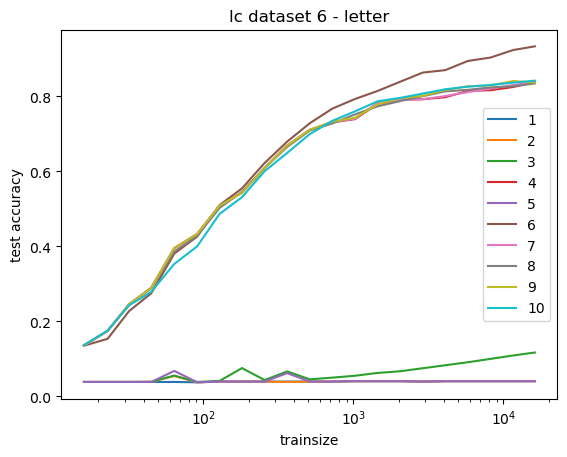

In [8]:
plot_lc(6)

1 - {"C": 0.0011973686775627167, "break_ties": true, "kernel": "sigmoid", "tol": 0.001, "coef0": 3.429402546113748e-05, "gamma": 125.11828955088302}
2 - {"C": 0.0015565580572890335, "break_ties": false, "kernel": "poly", "tol": 0.001, "coef0": 0.010141812764347587, "degree": 5, "gamma": 6.144420182700425e-08}
3 - {"C": 10599069.547276195, "break_ties": true, "kernel": "rbf", "tol": 0.001, "gamma": 3101.630241558003}
4 - {"C": 133007389881.91135, "break_ties": false, "kernel": "linear", "tol": 0.001}
5 - {"C": 176486.70746326947, "break_ties": true, "kernel": "sigmoid", "tol": 0.001, "coef0": 0.0020581464583522544, "gamma": 2.987402060797008e-09}
6 - {"C": 283491770.5937483, "break_ties": true, "kernel": "poly", "tol": 0.001, "coef0": 0.005443166683794488, "degree": 2, "gamma": 95286243716.9023}
7 - {"C": 44819589.71686548, "break_ties": false, "kernel": "linear", "tol": 0.001}
8 - {"C": 5465.2075550902, "break_ties": true, "kernel": "linear", "tol": 0.001}
9 - {"C": 619041.4305079113, 

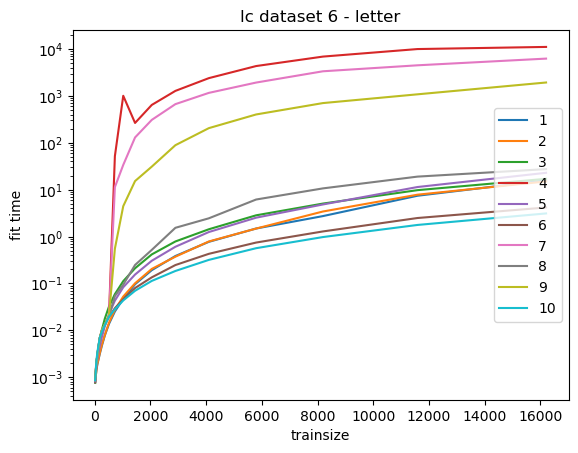

In [9]:
plot_fit_curve(6)

1 - {"C": 0.0011973686775627167, "break_ties": true, "kernel": "sigmoid", "tol": 0.001, "coef0": 3.429402546113748e-05, "gamma": 125.11828955088302}
2 - {"C": 0.0015565580572890335, "break_ties": false, "kernel": "poly", "tol": 0.001, "coef0": 0.010141812764347587, "degree": 5, "gamma": 6.144420182700425e-08}
3 - {"C": 10599069.547276195, "break_ties": true, "kernel": "rbf", "tol": 0.001, "gamma": 3101.630241558003}
4 - {"C": 176486.70746326947, "break_ties": true, "kernel": "sigmoid", "tol": 0.001, "coef0": 0.0020581464583522544, "gamma": 2.987402060797008e-09}
5 - {"C": 283491770.5937483, "break_ties": true, "kernel": "poly", "tol": 0.001, "coef0": 0.005443166683794488, "degree": 2, "gamma": 95286243716.9023}
6 - {"C": 44819589.71686548, "break_ties": false, "kernel": "linear", "tol": 0.001}
7 - {"C": 5465.2075550902, "break_ties": true, "kernel": "linear", "tol": 0.001}
8 - {"C": 619041.4305079113, "break_ties": false, "kernel": "linear", "tol": 0.001}
9 - {"C": 77847.45842463325, "

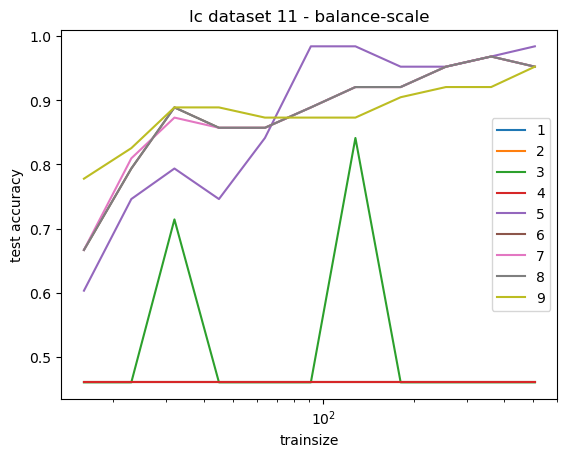

In [10]:
plot_lc(11)

1 - {"C": 0.0011973686775627167, "break_ties": true, "kernel": "sigmoid", "tol": 0.001, "coef0": 3.429402546113748e-05, "gamma": 125.11828955088302}
2 - {"C": 0.0015565580572890335, "break_ties": false, "kernel": "poly", "tol": 0.001, "coef0": 0.010141812764347587, "degree": 5, "gamma": 6.144420182700425e-08}
3 - {"C": 10599069.547276195, "break_ties": true, "kernel": "rbf", "tol": 0.001, "gamma": 3101.630241558003}
4 - {"C": 176486.70746326947, "break_ties": true, "kernel": "sigmoid", "tol": 0.001, "coef0": 0.0020581464583522544, "gamma": 2.987402060797008e-09}
5 - {"C": 283491770.5937483, "break_ties": true, "kernel": "poly", "tol": 0.001, "coef0": 0.005443166683794488, "degree": 2, "gamma": 95286243716.9023}
6 - {"C": 44819589.71686548, "break_ties": false, "kernel": "linear", "tol": 0.001}
7 - {"C": 5465.2075550902, "break_ties": true, "kernel": "linear", "tol": 0.001}
8 - {"C": 619041.4305079113, "break_ties": false, "kernel": "linear", "tol": 0.001}
9 - {"C": 77847.45842463325, "

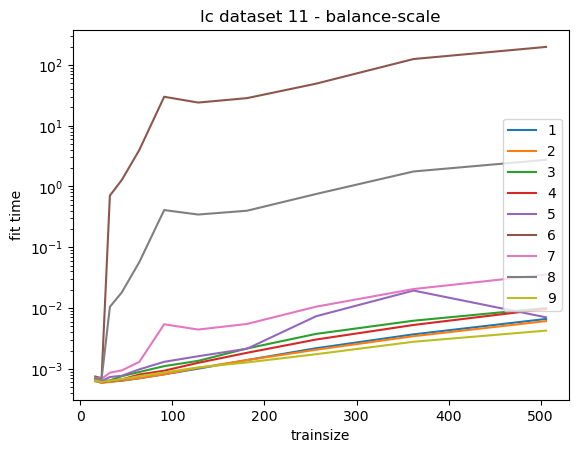

In [11]:
plot_fit_curve(11)

1 - {"C": 0.0011973686775627167, "break_ties": true, "kernel": "sigmoid", "tol": 0.001, "coef0": 3.429402546113748e-05, "gamma": 125.11828955088302}
2 - {"C": 0.0015565580572890335, "break_ties": false, "kernel": "poly", "tol": 0.001, "coef0": 0.010141812764347587, "degree": 5, "gamma": 6.144420182700425e-08}
3 - {"C": 10599069.547276195, "break_ties": true, "kernel": "rbf", "tol": 0.001, "gamma": 3101.630241558003}
4 - {"C": 133007389881.91135, "break_ties": false, "kernel": "linear", "tol": 0.001}
5 - {"C": 176486.70746326947, "break_ties": true, "kernel": "sigmoid", "tol": 0.001, "coef0": 0.0020581464583522544, "gamma": 2.987402060797008e-09}
6 - {"C": 283491770.5937483, "break_ties": true, "kernel": "poly", "tol": 0.001, "coef0": 0.005443166683794488, "degree": 2, "gamma": 95286243716.9023}
7 - {"C": 44819589.71686548, "break_ties": false, "kernel": "linear", "tol": 0.001}
8 - {"C": 5465.2075550902, "break_ties": true, "kernel": "linear", "tol": 0.001}
9 - {"C": 619041.4305079113, 

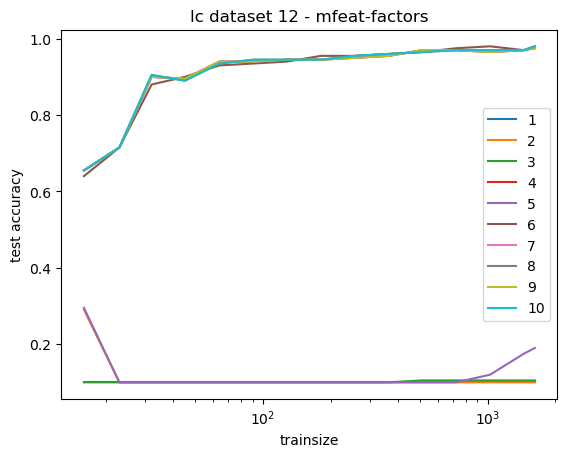

In [12]:
plot_lc(12)

1 - {"C": 0.0011973686775627167, "break_ties": true, "kernel": "sigmoid", "tol": 0.001, "coef0": 3.429402546113748e-05, "gamma": 125.11828955088302}
2 - {"C": 0.0015565580572890335, "break_ties": false, "kernel": "poly", "tol": 0.001, "coef0": 0.010141812764347587, "degree": 5, "gamma": 6.144420182700425e-08}
3 - {"C": 10599069.547276195, "break_ties": true, "kernel": "rbf", "tol": 0.001, "gamma": 3101.630241558003}
4 - {"C": 133007389881.91135, "break_ties": false, "kernel": "linear", "tol": 0.001}
5 - {"C": 176486.70746326947, "break_ties": true, "kernel": "sigmoid", "tol": 0.001, "coef0": 0.0020581464583522544, "gamma": 2.987402060797008e-09}
6 - {"C": 283491770.5937483, "break_ties": true, "kernel": "poly", "tol": 0.001, "coef0": 0.005443166683794488, "degree": 2, "gamma": 95286243716.9023}
7 - {"C": 44819589.71686548, "break_ties": false, "kernel": "linear", "tol": 0.001}
8 - {"C": 5465.2075550902, "break_ties": true, "kernel": "linear", "tol": 0.001}
9 - {"C": 619041.4305079113, 

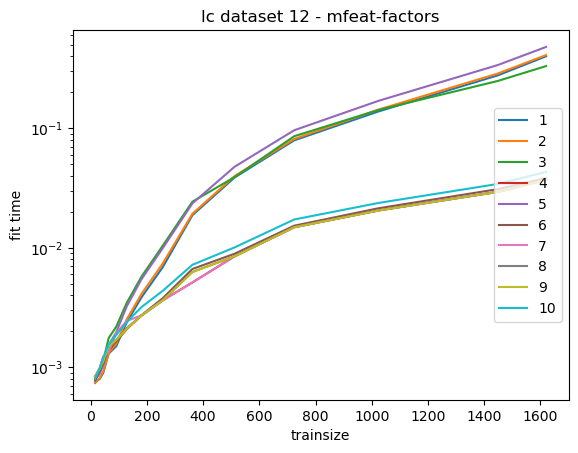

In [13]:
plot_fit_curve(12)

1 - {"C": 0.0011973686775627167, "break_ties": true, "kernel": "sigmoid", "tol": 0.001, "coef0": 3.429402546113748e-05, "gamma": 125.11828955088302}
2 - {"C": 0.0015565580572890335, "break_ties": false, "kernel": "poly", "tol": 0.001, "coef0": 0.010141812764347587, "degree": 5, "gamma": 6.144420182700425e-08}
3 - {"C": 10599069.547276195, "break_ties": true, "kernel": "rbf", "tol": 0.001, "gamma": 3101.630241558003}
4 - {"C": 133007389881.91135, "break_ties": false, "kernel": "linear", "tol": 0.001}
5 - {"C": 176486.70746326947, "break_ties": true, "kernel": "sigmoid", "tol": 0.001, "coef0": 0.0020581464583522544, "gamma": 2.987402060797008e-09}
6 - {"C": 283491770.5937483, "break_ties": true, "kernel": "poly", "tol": 0.001, "coef0": 0.005443166683794488, "degree": 2, "gamma": 95286243716.9023}
7 - {"C": 44819589.71686548, "break_ties": false, "kernel": "linear", "tol": 0.001}
8 - {"C": 5465.2075550902, "break_ties": true, "kernel": "linear", "tol": 0.001}
9 - {"C": 619041.4305079113, 

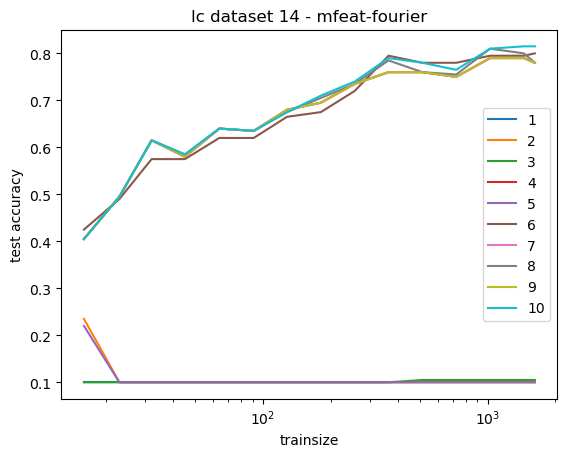

In [14]:
plot_lc(14)

1 - {"C": 0.0011973686775627167, "break_ties": true, "kernel": "sigmoid", "tol": 0.001, "coef0": 3.429402546113748e-05, "gamma": 125.11828955088302}
2 - {"C": 0.0015565580572890335, "break_ties": false, "kernel": "poly", "tol": 0.001, "coef0": 0.010141812764347587, "degree": 5, "gamma": 6.144420182700425e-08}
3 - {"C": 10599069.547276195, "break_ties": true, "kernel": "rbf", "tol": 0.001, "gamma": 3101.630241558003}
4 - {"C": 133007389881.91135, "break_ties": false, "kernel": "linear", "tol": 0.001}
5 - {"C": 176486.70746326947, "break_ties": true, "kernel": "sigmoid", "tol": 0.001, "coef0": 0.0020581464583522544, "gamma": 2.987402060797008e-09}
6 - {"C": 283491770.5937483, "break_ties": true, "kernel": "poly", "tol": 0.001, "coef0": 0.005443166683794488, "degree": 2, "gamma": 95286243716.9023}
7 - {"C": 44819589.71686548, "break_ties": false, "kernel": "linear", "tol": 0.001}
8 - {"C": 5465.2075550902, "break_ties": true, "kernel": "linear", "tol": 0.001}
9 - {"C": 619041.4305079113, 

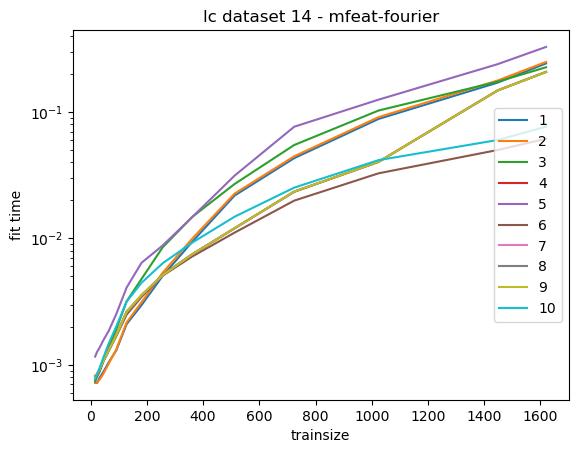

In [15]:
plot_fit_curve(14)

1 - {"C": 0.0011973686775627167, "break_ties": true, "kernel": "sigmoid", "tol": 0.001, "coef0": 3.429402546113748e-05, "gamma": 125.11828955088302}
2 - {"C": 0.0015565580572890335, "break_ties": false, "kernel": "poly", "tol": 0.001, "coef0": 0.010141812764347587, "degree": 5, "gamma": 6.144420182700425e-08}
3 - {"C": 10599069.547276195, "break_ties": true, "kernel": "rbf", "tol": 0.001, "gamma": 3101.630241558003}
4 - {"C": 133007389881.91135, "break_ties": false, "kernel": "linear", "tol": 0.001}
5 - {"C": 176486.70746326947, "break_ties": true, "kernel": "sigmoid", "tol": 0.001, "coef0": 0.0020581464583522544, "gamma": 2.987402060797008e-09}
6 - {"C": 283491770.5937483, "break_ties": true, "kernel": "poly", "tol": 0.001, "coef0": 0.005443166683794488, "degree": 2, "gamma": 95286243716.9023}
7 - {"C": 44819589.71686548, "break_ties": false, "kernel": "linear", "tol": 0.001}
8 - {"C": 5465.2075550902, "break_ties": true, "kernel": "linear", "tol": 0.001}
9 - {"C": 619041.4305079113, 

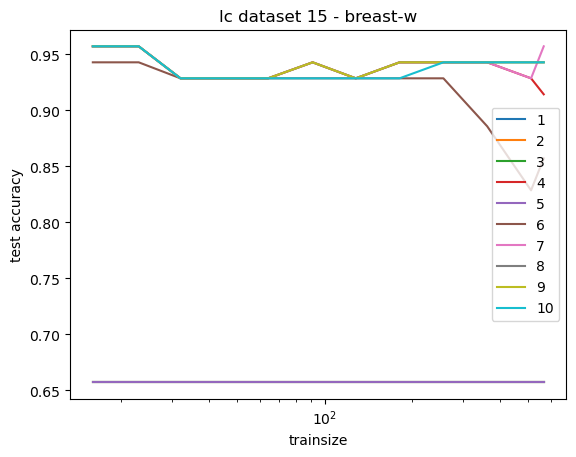

In [16]:
plot_lc(15)

1 - {"C": 0.0011973686775627167, "break_ties": true, "kernel": "sigmoid", "tol": 0.001, "coef0": 3.429402546113748e-05, "gamma": 125.11828955088302}
2 - {"C": 0.0015565580572890335, "break_ties": false, "kernel": "poly", "tol": 0.001, "coef0": 0.010141812764347587, "degree": 5, "gamma": 6.144420182700425e-08}
3 - {"C": 10599069.547276195, "break_ties": true, "kernel": "rbf", "tol": 0.001, "gamma": 3101.630241558003}
4 - {"C": 133007389881.91135, "break_ties": false, "kernel": "linear", "tol": 0.001}
5 - {"C": 176486.70746326947, "break_ties": true, "kernel": "sigmoid", "tol": 0.001, "coef0": 0.0020581464583522544, "gamma": 2.987402060797008e-09}
6 - {"C": 283491770.5937483, "break_ties": true, "kernel": "poly", "tol": 0.001, "coef0": 0.005443166683794488, "degree": 2, "gamma": 95286243716.9023}
7 - {"C": 44819589.71686548, "break_ties": false, "kernel": "linear", "tol": 0.001}
8 - {"C": 5465.2075550902, "break_ties": true, "kernel": "linear", "tol": 0.001}
9 - {"C": 619041.4305079113, 

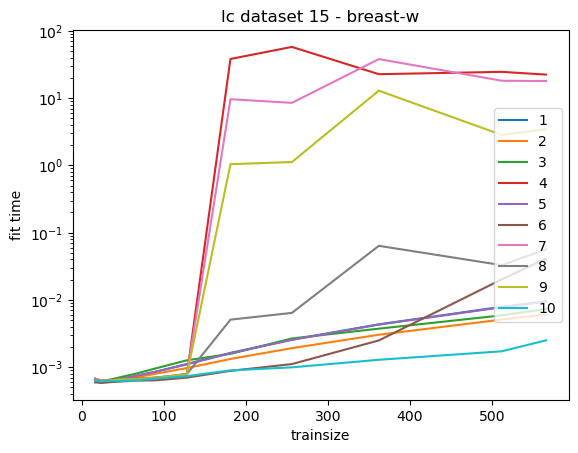

In [17]:
plot_fit_curve(15)

1 - {"C": 0.0011973686775627167, "break_ties": true, "kernel": "sigmoid", "tol": 0.001, "coef0": 3.429402546113748e-05, "gamma": 125.11828955088302}
2 - {"C": 0.0015565580572890335, "break_ties": false, "kernel": "poly", "tol": 0.001, "coef0": 0.010141812764347587, "degree": 5, "gamma": 6.144420182700425e-08}
3 - {"C": 10599069.547276195, "break_ties": true, "kernel": "rbf", "tol": 0.001, "gamma": 3101.630241558003}
4 - {"C": 133007389881.91135, "break_ties": false, "kernel": "linear", "tol": 0.001}
5 - {"C": 176486.70746326947, "break_ties": true, "kernel": "sigmoid", "tol": 0.001, "coef0": 0.0020581464583522544, "gamma": 2.987402060797008e-09}
6 - {"C": 283491770.5937483, "break_ties": true, "kernel": "poly", "tol": 0.001, "coef0": 0.005443166683794488, "degree": 2, "gamma": 95286243716.9023}
7 - {"C": 44819589.71686548, "break_ties": false, "kernel": "linear", "tol": 0.001}
8 - {"C": 5465.2075550902, "break_ties": true, "kernel": "linear", "tol": 0.001}
9 - {"C": 619041.4305079113, 

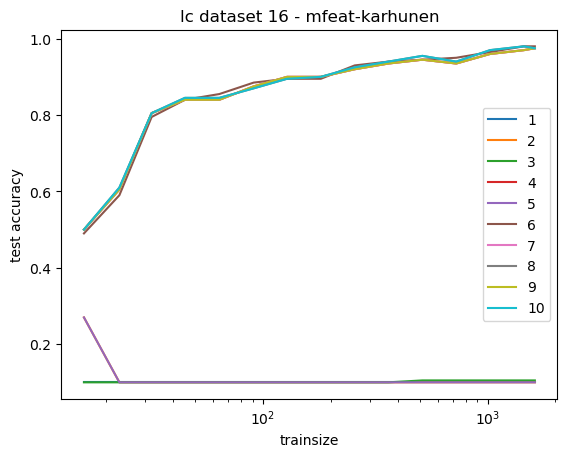

In [18]:
plot_lc(16)

1 - {"C": 0.0011973686775627167, "break_ties": true, "kernel": "sigmoid", "tol": 0.001, "coef0": 3.429402546113748e-05, "gamma": 125.11828955088302}
2 - {"C": 0.0015565580572890335, "break_ties": false, "kernel": "poly", "tol": 0.001, "coef0": 0.010141812764347587, "degree": 5, "gamma": 6.144420182700425e-08}
3 - {"C": 10599069.547276195, "break_ties": true, "kernel": "rbf", "tol": 0.001, "gamma": 3101.630241558003}
4 - {"C": 133007389881.91135, "break_ties": false, "kernel": "linear", "tol": 0.001}
5 - {"C": 176486.70746326947, "break_ties": true, "kernel": "sigmoid", "tol": 0.001, "coef0": 0.0020581464583522544, "gamma": 2.987402060797008e-09}
6 - {"C": 283491770.5937483, "break_ties": true, "kernel": "poly", "tol": 0.001, "coef0": 0.005443166683794488, "degree": 2, "gamma": 95286243716.9023}
7 - {"C": 44819589.71686548, "break_ties": false, "kernel": "linear", "tol": 0.001}
8 - {"C": 5465.2075550902, "break_ties": true, "kernel": "linear", "tol": 0.001}
9 - {"C": 619041.4305079113, 

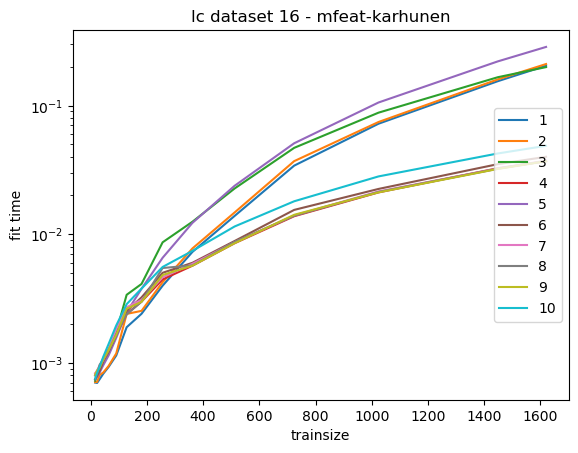

In [19]:
plot_fit_curve(16)

1 - {"C": 133007389881.91135, "break_ties": false, "kernel": "linear", "tol": 0.001}
2 - {"C": 44819589.71686548, "break_ties": false, "kernel": "linear", "tol": 0.001}


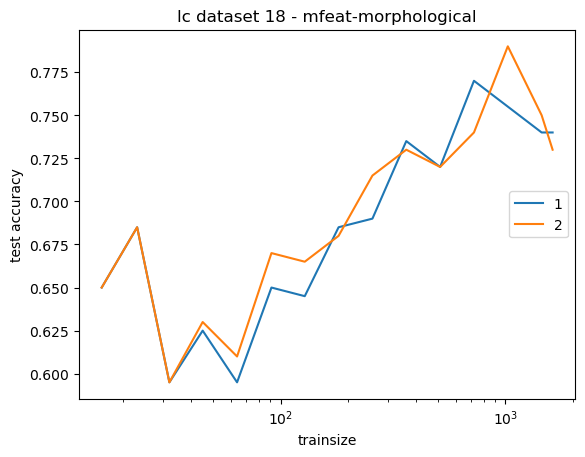

In [20]:
plot_lc(18)

1 - {"C": 133007389881.91135, "break_ties": false, "kernel": "linear", "tol": 0.001}
2 - {"C": 44819589.71686548, "break_ties": false, "kernel": "linear", "tol": 0.001}


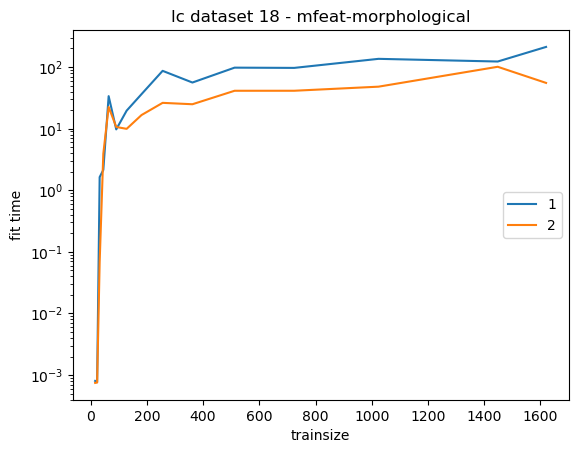

In [21]:
plot_fit_curve(18)